Examples of ACF calculation with epoched methods:
1. isttc concat
2. PearsonR trial averaged
3. iSTTC trial averaged (works like PearsonR but with non binned data)

In [1]:
import numpy as np
import pandas as pd
import pickle

from isttc.scripts.cfg_global import project_folder_path
from isttc.spike_utils import simulate_hawkes_thinning

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
results_folder = project_folder_path + 'results\\synthetic\\results\\fixed_params\\'

### Generate test data

In [3]:
rate_hz     = 7  
tau_ms      = 300.0    
alpha       = 0.5    
duration_ms = 10*60*1000*1    

# generate
num_trials = 1
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=trial  # different seed per trial
    )
    all_spike_trains.append(spikes)

In [4]:
all_spike_trains

[array([1.94266258e+02, 1.97164794e+02, 3.34877882e+02, ...,
        5.99686568e+05, 5.99704085e+05, 5.99834468e+05])]

### Load data

In [5]:
with open(results_folder + 'acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(results_folder + 'acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

with open(results_folder + 'pearsonr_trial_avg_50ms_20lags_dict.pkl', "rb") as f:
    pearsonr_trial_avg_dict = pickle.load(f)

with open(results_folder + 'sttc_trial_avg_50ms_20lags_dict.pkl', "rb") as f:
    sttc_trial_avg_dict = pickle.load(f)

with open(results_folder + 'sttc_trial_concat_50ms_20lags_dict.pkl', "rb") as f:
    sttc_trial_concat_dict = pickle.load(f)

print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')
print(f'len pearsonr_trial_avg_dict {len(pearsonr_trial_avg_dict)}')
print(f'len sttc_trial_avg_dict {len(sttc_trial_avg_dict)}')
print(f'len sttc_trial_concat_dict {len(sttc_trial_concat_dict)}')

len isttc_full_dict 1000
len acf_full_dict 1000
len pearsonr_trial_avg_dict 1000
len sttc_trial_avg_dict 1000
len sttc_trial_concat_dict 1000


In [6]:
tau_concat_df = pd.read_pickle(results_folder + 'tau_concat_df.pkl')

In [7]:
tau_concat_df_subset = tau_concat_df.query('tau_ms > 99 and tau_ms < 101 and decline_150_250 == True and fit_r_squared > 0.9')
tau_concat_df_subset

,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,log_tau_ms
22,22,2.012371,0.976963,True,acf_full,100.618573,2.002678
54,54,1.984574,0.943627,True,acf_full,99.228680,1.996637
87,87,1.991409,0.949218,True,acf_full,99.570447,1.998130
88,88,2.009391,0.938578,True,acf_full,100.469528,2.002034
107,107,2.018447,0.932584,True,acf_full,100.922325,2.003987
...,...,...,...,...,...,...,...
1924,924,2.015981,0.934912,True,isttc_full,100.799055,2.003456
1962,962,1.991042,0.945537,True,isttc_full,99.552117,1.998051
1994,994,2.001659,0.970564,True,isttc_full,100.082942,2.000360
1995,995,1.985308,0.917726,True,isttc_full,99.265379,1.996798


In [8]:
tau_concat_df.query('unit_id == 994')

,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,log_tau_ms
994,994,1.910803,9.496814e-01,True,acf_full,9.554013e+01,1.980186
1994,994,2.001659,9.705645e-01,True,isttc_full,1.000829e+02,2.000360
101400,994,0.047840,-3.413625e-10,True,pearsonr_trial_avg,2.392021e+00,0.378765
101401,994,3.114304,4.631147e-01,False,pearsonr_trial_avg,1.557152e+02,2.192331
101402,994,3.257762,5.549950e-01,True,pearsonr_trial_avg,1.628881e+02,2.211889
...,...,...,...,...,...,...,...
301495,994,0.522713,8.421871e-02,True,sttc_trial_avg,2.613564e+01,1.417233
301496,994,37124.572056,6.162742e-01,False,sttc_trial_avg,1.856229e+06,6.268631
301497,994,3.333858,3.682801e-01,False,sttc_trial_avg,1.666929e+02,2.221917
301498,994,0.087885,1.427255e-01,False,sttc_trial_avg,4.394226e+00,0.642882


In [9]:
tau_concat_df.query('unit_id == 994 and method == "pearsonr_trial_avg"')

,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,log_tau_ms
101400,994,0.047840,-3.413625e-10,True,pearsonr_trial_avg,2.392021e+00,0.378765
101401,994,3.114304,4.631147e-01,False,pearsonr_trial_avg,1.557152e+02,2.192331
101402,994,3.257762,5.549950e-01,True,pearsonr_trial_avg,1.628881e+02,2.211889
101403,994,0.332414,2.287008e-01,True,pearsonr_trial_avg,1.662072e+01,1.220650
101404,994,0.126151,3.561738e-01,True,pearsonr_trial_avg,6.307526e+00,0.799859
...,...,...,...,...,...,...,...
101495,994,0.460927,1.007852e-01,True,pearsonr_trial_avg,2.304636e+01,1.362602
101496,994,100454.626054,8.633683e-01,False,pearsonr_trial_avg,5.022731e+06,6.700940
101497,994,2.666756,2.543315e-01,False,pearsonr_trial_avg,1.333378e+02,2.124953
101498,994,0.086614,1.880105e-01,False,pearsonr_trial_avg,4.330679e+00,0.636556


### Plot

In [10]:
unit_id = 994

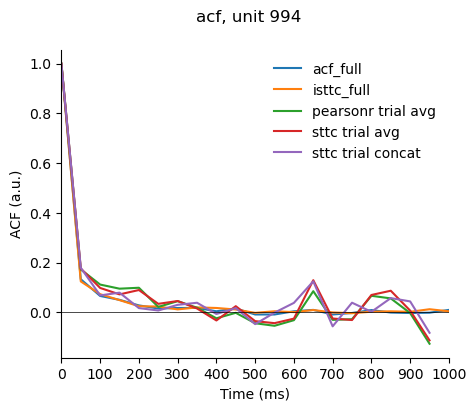

In [11]:
fig, axes = plt.subplots(1,1, figsize=(5,4))

axes.plot(acf_full_dict[unit_id]['acf'], 
          label='acf_full')
axes.plot(isttc_full_dict[unit_id]['acf'], 
          label='isttc_full')
axes.plot(pearsonr_trial_avg_dict[unit_id]['acf'][2], 
          label='pearsonr trial avg')
axes.plot(sttc_trial_avg_dict[unit_id]['acf'][2], 
          label='sttc trial avg')
axes.plot(sttc_trial_concat_dict[unit_id]['acf'][2], 
          label='sttc trial concat')

axes.axhline(y=0, lw=0.5, c='k')

axes.legend(frameon=False)

fig.suptitle('acf, unit ' + str(unit_id))

axes.set_ylabel('ACF (a.u.)')
axes.set_xlabel('Time (ms)')
axes.set_xticks(np.linspace(0, 20, 11).astype(int))
axes.set_xticklabels(np.linspace(0, 1000, 11).astype(int))
axes.set_xlim([0,20])

sns.despine()
    
    # fig.savefig(fig_folder + 'acf_1000ms_no_empty_50ms_20lags_unit_' + str(unit_id) + '.png' , bbox_inches='tight')
    # plt.close()

Text(0.5, 1.0, 'unit 994, pearsonr')

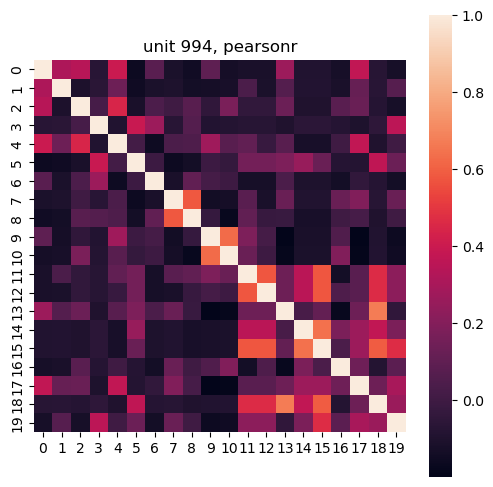

In [13]:
acf_matrix_ = pearsonr_trial_avg_dict[unit_id]['acf_matrix'][2]
metric_ = 'pearsonr'


fig, axes = plt.subplots(1,1,figsize=(6,6))
acf_matrix_plot = acf_matrix_.T + acf_matrix_
np.fill_diagonal(acf_matrix_plot, 1)
sns.heatmap(acf_matrix_plot, ax=axes)
axes.set_aspect('equal', adjustable='box')
axes.set_title('unit ' + str(unit_id) + ', ' + metric_)
#fig.savefig(fig_folder + 'unit_' + str(unit_id_), bbox_inches='tight')
#plt.close()

Text(0.5, 1.0, 'unit 994, sttc')

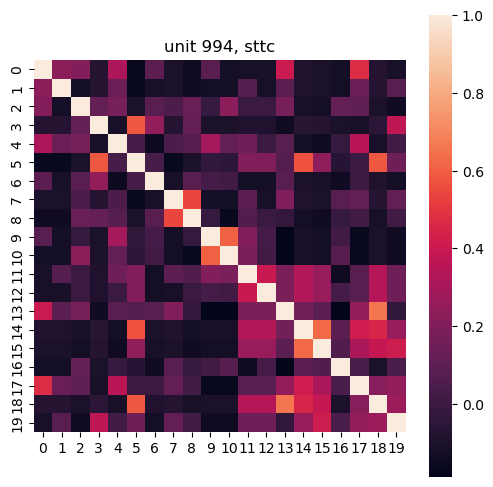

In [14]:
acf_matrix_ = sttc_trial_avg_dict[unit_id]['acf_matrix'][2]
metric_ = 'sttc'


fig, axes = plt.subplots(1,1,figsize=(6,6))
acf_matrix_plot = acf_matrix_.T + acf_matrix_
np.fill_diagonal(acf_matrix_plot, 1)
sns.heatmap(acf_matrix_plot, ax=axes)
axes.set_aspect('equal', adjustable='box')
axes.set_title('unit ' + str(unit_id) + ', ' + metric_)
#fig.savefig(fig_folder + 'unit_' + str(unit_id_), bbox_inches='tight')
#plt.close()